In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Loading Dataset

In [2]:
df1 = pd.read_csv("train_load.csv")

In [145]:
df.head()

,Loan_ID,Loan_Amount_Term,Credit_History,Loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Trans_ApplicantIncome,Trans_CoapplicantIncome,Trans_LoanAmount
0,LP001002,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.172214
1,LP001003,30.0,1.0,0,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214
2,LP001005,30.0,1.0,1,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489
3,LP001006,30.0,1.0,1,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637
4,LP001008,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027


In [4]:
# ch = scaling.transform([[4006,1526.0,168.0]])

In [5]:
# ch

In [6]:
# ch[0][0]

In [7]:
# ch[0][1]

In [8]:
# ch[0][2]

In [9]:
df1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df = df1.copy()

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [15]:
cat_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [16]:
cat_features.remove('Loan_ID')

In [17]:
# What I have seen is that the target variable is of string/object type and since we will need to analyze the whole data
# which is bettet if the target feature is of numeric type
# so I am going to convert the dependent variable into numrical type using lableEncoder of scikit learn lib


In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [20]:
le.fit(df['Loan_Status'])

LabelEncoder()

In [21]:
df["Loan_status"] = pd.Series(le.transform(df['Loan_Status']))

In [22]:
# df.drop(["Loan_Status"],axis = 1, inplace = True)

In [23]:
num_features = [feature for feature in df.columns if feature not in cat_features and feature != 'Loan_ID']

In [24]:
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_status']

In [25]:
# num_features.append("Loan_status")

In [26]:
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_status']

## Analyzing numerical features

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Loan_status'}>]], dtype=object)

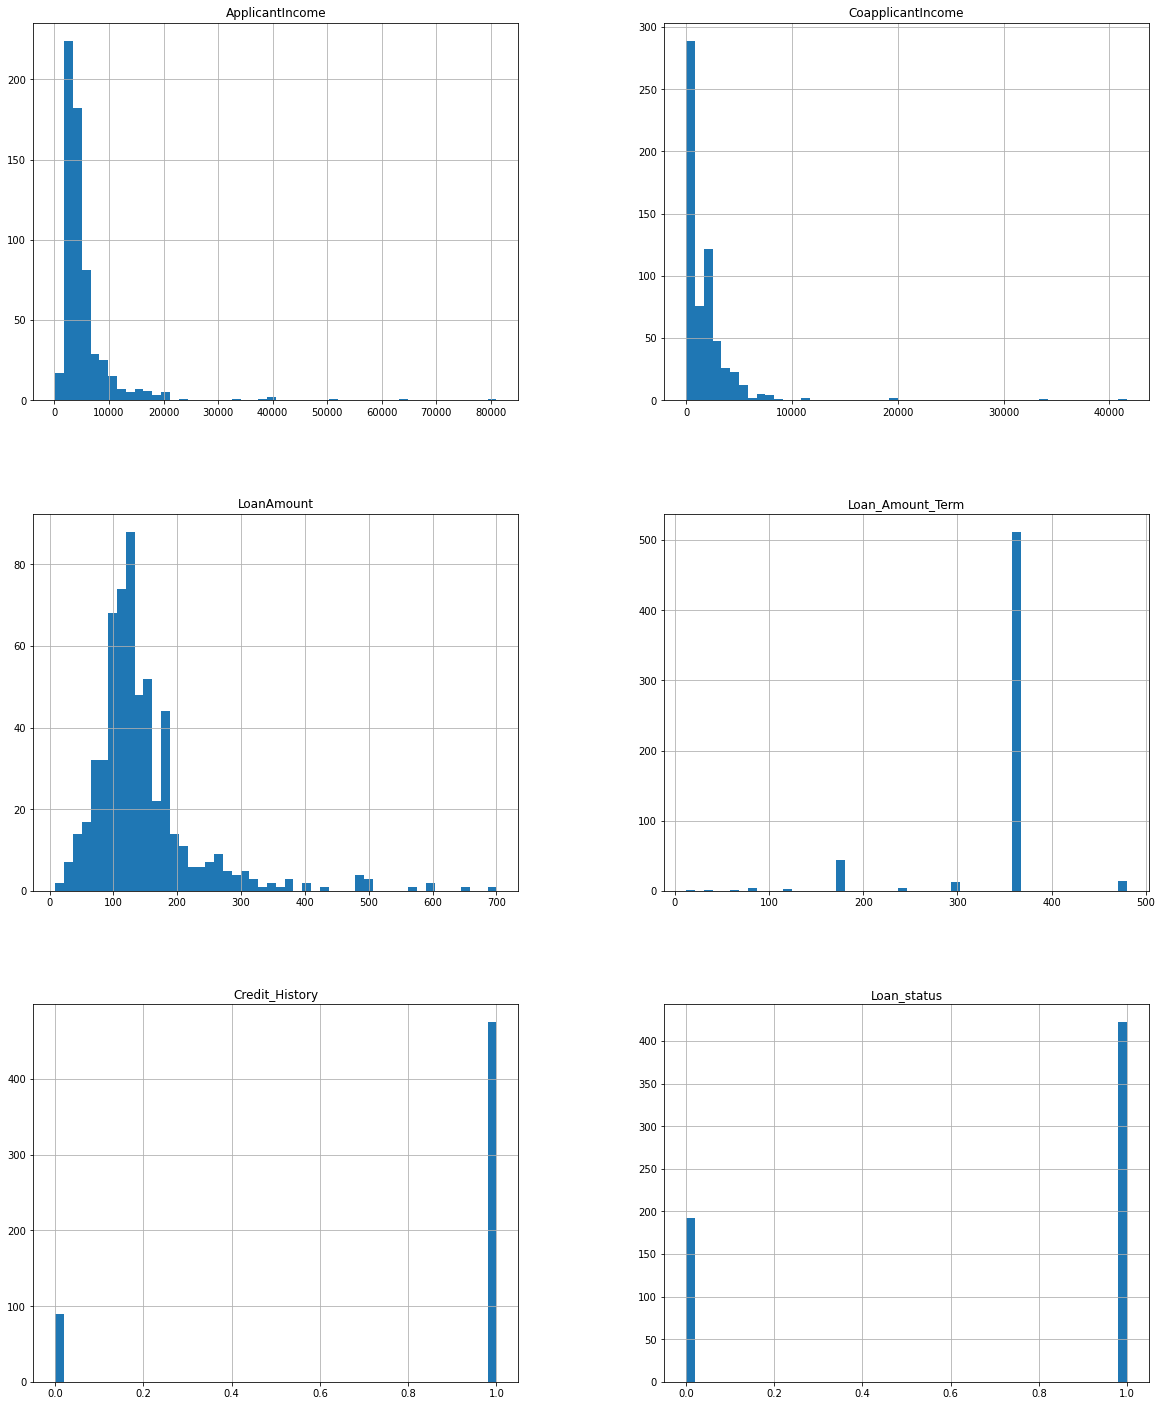

In [27]:
df[num_features].hist(bins = 50, figsize = (20,25))

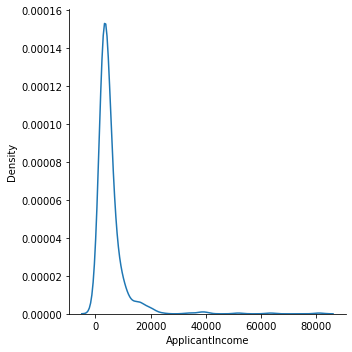

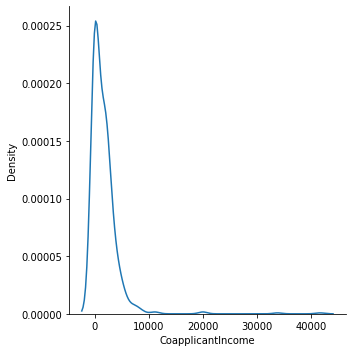

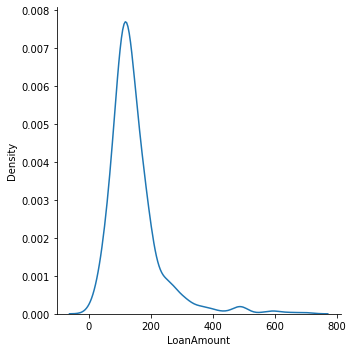

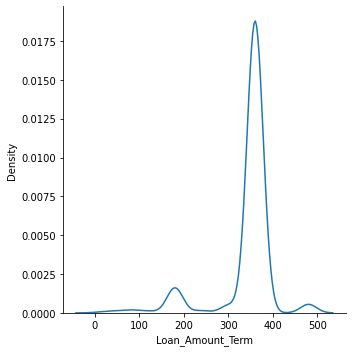

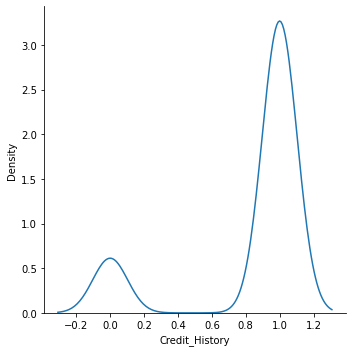

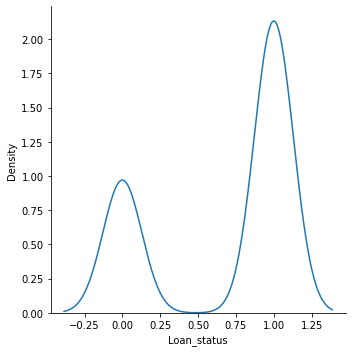

In [28]:
for feature in num_features:
    sns.displot(data=df, x=feature, kind = "kde")

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

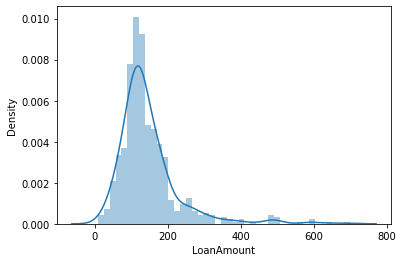

In [29]:
sns.distplot(df['LoanAmount'])

1. On checking the distribution of the numerical feature what we found out is that applicantIncome, coapplicantincome and LoanAmount are little bit right skewed.
2. The LoanAmountTerm and CreditHistory are possessing some categories inside them.



In [30]:
# Categories in LoanAmountTerm and CreditHistory
print(df["Loan_Amount_Term"].value_counts())
print(df["Credit_History"].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [31]:
# Checking the null values 
df[num_features].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_status           0
dtype: int64

In [32]:
# Percentage of null values
df[num_features].isnull().sum()/len(df) * 100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Loan_status          0.000000
dtype: float64

In [33]:
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_status']

## correlation for numerical features


In [34]:
df[num_features].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

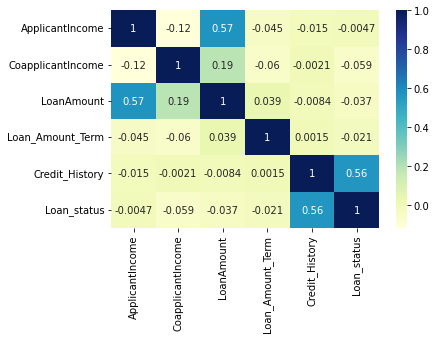

In [35]:
sns.heatmap(df[num_features].corr(), cmap="YlGnBu", annot=True)

In [36]:
# Now let's visualize the null values
df[num_features].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_status           0
dtype: int64

In [37]:
print("The percentage of missing values in numeric features are: ")
df[num_features].isnull().sum()/len(df)* 100

The percentage of missing values in numeric features are: 


ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Loan_status          0.000000
dtype: float64

<AxesSubplot:xlabel='LoanAmount'>

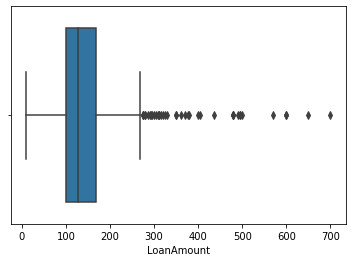

In [38]:
# visualizing the outliers in numeric feature
sns.boxplot(x=df['LoanAmount'])

In [39]:
# plotting the box plot for outliers in categorical data if it is a binary classifier
# sns.catplot(x='car',hue='TARGET_happiness',data=df,kind="count")
# car is a independent feature and has some categories in it.
# since it is a catplot it won't work with numerical features even if the numerical features have categories in them.

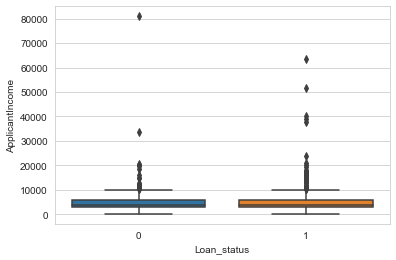

In [40]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Loan_status',y='ApplicantIncome',data=df)

<AxesSubplot:xlabel='ApplicantIncome'>

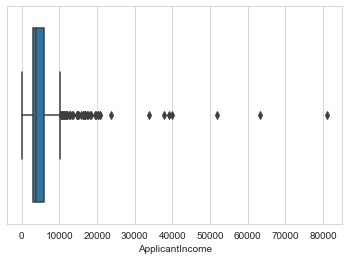

In [41]:
sns.boxplot(x = df['ApplicantIncome'])

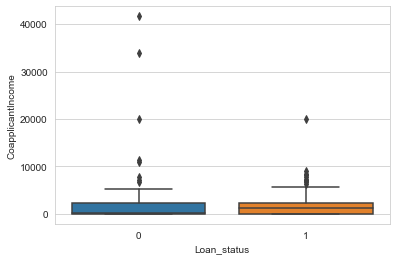

In [42]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Loan_status',y='CoapplicantIncome',data=df)

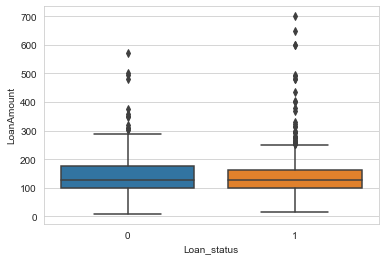

In [43]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Loan_status',y='LoanAmount',data=df)

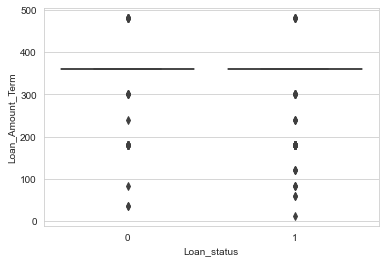

In [44]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Loan_status',y='Loan_Amount_Term',data=df)

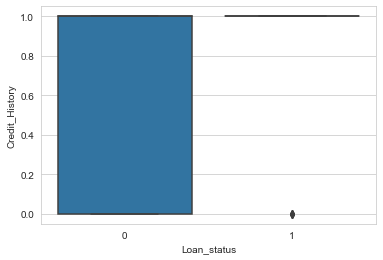

In [45]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Loan_status',y='Credit_History',data=df)

## Categorical Features Analysis

In [46]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [47]:
# cat_features.remove('Loan_Status')

In [48]:
# Null values
df[cat_features].isnull().sum()


Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [49]:
df[cat_features].isnull().sum()/len(df) * 100

Gender           2.117264
Married          0.488599
Dependents       2.442997
Education        0.000000
Self_Employed    5.211726
Property_Area    0.000000
Loan_Status      0.000000
dtype: float64

In [50]:
for f in cat_features:
    print("The feature is {} and the percentage of missing values are {}".format(f,df[f].isnull().sum()/len(df)* 100))

The feature is Gender and the percentage of missing values are 2.1172638436482085
The feature is Married and the percentage of missing values are 0.4885993485342019
The feature is Dependents and the percentage of missing values are 2.44299674267101
The feature is Education and the percentage of missing values are 0.0
The feature is Self_Employed and the percentage of missing values are 5.211726384364821
The feature is Property_Area and the percentage of missing values are 0.0
The feature is Loan_Status and the percentage of missing values are 0.0


Since the percentage of missing values are quite less so we can easily impute them using mode imputation

In [51]:
# listing the no of categories in each cat_features

In [52]:
df[cat_features].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

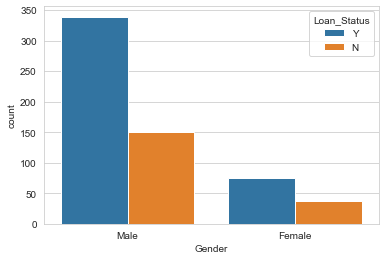

In [53]:
sns.countplot(x ='Gender', hue = "Loan_Status", data = df)

C:\Users\user1\AppData\Local\Temp/ipykernel_1344/258071043.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


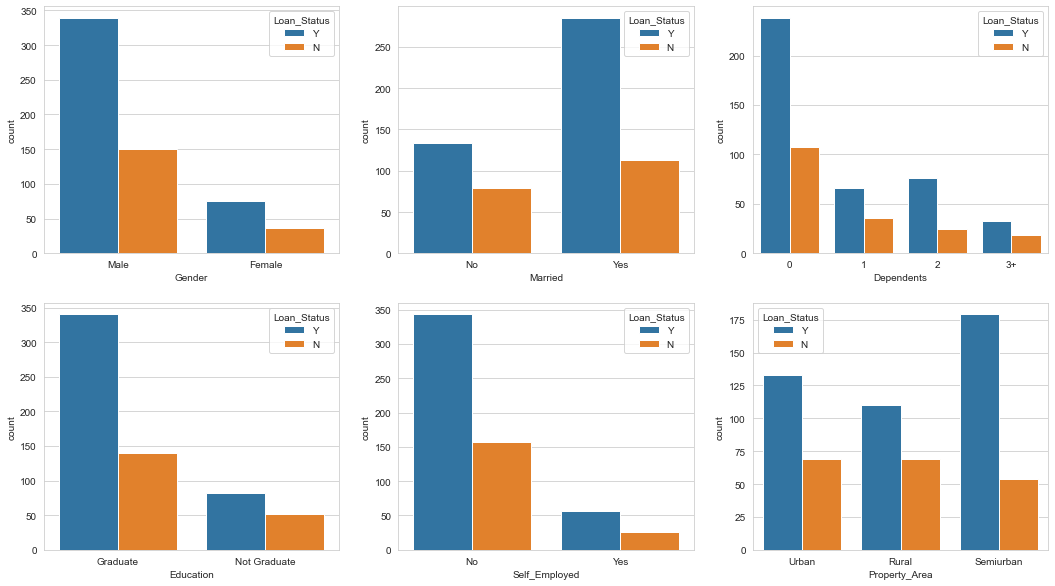

In [54]:
fig, ax =plt.subplots(2,3, figsize = (18,10))
sns.countplot(x ='Gender', hue = "Loan_Status", data = df, ax = ax[0,0])
sns.countplot(x ='Married', hue = "Loan_Status", data = df, ax = ax[0,1])
sns.countplot(x ='Dependents', hue = "Loan_Status", data = df, ax = ax[0,2])
sns.countplot(x ='Education', hue = "Loan_Status", data = df, ax = ax[1,0])
sns.countplot(x ='Self_Employed', hue = "Loan_Status", data = df, ax = ax[1,1])
sns.countplot(x ='Property_Area', hue = "Loan_Status", data = df, ax = ax[1,2])
fig.show()

# Feature Engineering 

## 1. Handling the null values

Since the percentage of null values are less so we are just using mean, median and mode imputation techniques to fill the missing values

## for numerical data

In [55]:
# imputation of numerical features

In [56]:
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [57]:
# df['ApplicantIncome'].fillna(df['ApplicantIncome'].median(), inplace = True)

In [58]:
# df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].median(), inplace = True)

In [59]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [60]:
# dataframe = df.copy()

In [61]:
# df = dataframe.copy()

In [62]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().index[0], inplace = True)

In [63]:
df["Credit_History"].fillna(df['Credit_History'].value_counts().index[0], inplace = True)

In [64]:
df[num_features].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_status          0
dtype: int64

## for categorical data

In [65]:
cat_features.remove("Loan_Status")

In [66]:
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [67]:
df[cat_features].isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [68]:
df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace = True)
df['Married'].fillna(df['Married'].value_counts().index[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0], inplace = True)

In [69]:
df[cat_features].isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [70]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_status          0
dtype: int64

In [115]:
df.head()

,Loan_ID,Loan_Amount_Term,Credit_History,Loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Trans_ApplicantIncome,Trans_CoapplicantIncome,Trans_LoanAmount
0,LP001002,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.172214
1,LP001003,30.0,1.0,0,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214
2,LP001005,30.0,1.0,1,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489
3,LP001006,30.0,1.0,1,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637
4,LP001008,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027


## 2. Encoding categorical features

In [71]:
df[cat_features].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
dtype: int64

In [72]:
for f in cat_features:
    print(df[f].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [73]:
# cf = df.copy()

In [74]:
# Airline = train_data[["Airline"]]

# Airline = pd.get_dummies(Airline, drop_first= True)

In [75]:
Gender = df[["Gender"]]
Gender = pd.get_dummies(Gender, drop_first = True)

In [76]:
Gender.head()

,Gender_Male
0,1
1,1
2,1
3,1
4,1


In [77]:
Married = df[["Married"]]
Married = pd.get_dummies(Married, drop_first = True)

In [78]:
Married.head()

,Married_Yes
0,0
1,1
2,1
3,1
4,0


In [79]:
Dependents = df[["Dependents"]]
Dependents = pd.get_dummies(Dependents, drop_first = True)

In [80]:
Dependents.head()

,Dependents_1,Dependents_2,Dependents_3+
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [81]:
Education = df[["Education"]]
Education = pd.get_dummies(Education, drop_first = True)

In [82]:
Education.head()

,Education_Not Graduate
0,0
1,0
2,0
3,1
4,0


In [83]:
Self_Employed = df[["Self_Employed"]]
Self_Employed = pd.get_dummies(Self_Employed, drop_first = True)

In [84]:
Self_Employed.head()

,Self_Employed_Yes
0,0
1,0
2,1
3,0
4,0


In [85]:
Property_Area = df[["Property_Area"]]
Property_Area = pd.get_dummies(Property_Area, drop_first = True)

In [86]:
Property_Area.head()

,Property_Area_Semiurban,Property_Area_Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [87]:
all_cat_encoded_frame = pd.concat([Gender,Married, Dependents, Education, Self_Employed, Property_Area], axis = 1)
all_cat_encoded_frame.head()


,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


In [88]:
# #Since the married feature was not being encoded by our encoder function so here we have manaully done it.
# married_dummies = pd.get_dummies(df["Married"])
# df = pd.concat([df,married_dummies], axis = 1)
# df.drop(["Married","Yes"], axis = 1, inplace = True)

In [89]:
# married_dummies = pd.get_dummies(df["Married"])

In [90]:
# married_dummies

In [91]:
# cat_feature_excluding_married = cat_features.copy()

In [92]:
# cat_feature_excluding_married.remove("Married")

In [93]:
# cat_feature_excluding_married

In [94]:
# cf = df.copy()
# cf.drop('Loan_Status', axis =1 , inplace = True)

In [95]:
# # def encoder(data, feature):
#     dummies = pd.get_dummies(data[feature])
#     data = pd.concat([data, dummies], axis = 1)
#     rem_cat = data[feature].value_counts().index[0]
#     data.drop([feature,rem_cat], axis = 1 , inplace = True)
#     return data

In [96]:
# for feature in cat_feature_excluding_married:
#     df = encoder(df, feature)

In [97]:
# df.head(5) ##previous wala cf

In [98]:
# df.head(5)

In [99]:
# cat_features

In [100]:
# df.head()


In [101]:
df = pd.concat([df,all_cat_encoded_frame], axis = 1)

In [102]:
df.drop(['Gender','Married','Dependents','Self_Employed','Education','Property_Area'], axis = 1, inplace = True)

In [103]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x: x/12)

In [105]:
df1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [104]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,30.0,1.0,Y,1,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,30.0,1.0,N,0,1,1,1,0,0,0,0,0,0
2,LP001005,3000,0.0,66.0,30.0,1.0,Y,1,1,1,0,0,0,0,1,0,1
3,LP001006,2583,2358.0,120.0,30.0,1.0,Y,1,1,1,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.0,30.0,1.0,Y,1,1,0,0,0,0,0,0,0,1


## Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaling = MinMaxScaler()

In [108]:
df_minmaxed = pd.DataFrame(scaling.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]), columns = ['Trans_ApplicantIncome','Trans_CoapplicantIncome','Trans_LoanAmount'])

In [102]:
# x = np.array(5014)

In [103]:
# x

array(5014)

In [116]:
# import pickle
# pickle_out = open("scaler.pkl","wb")
# pickle.dump(scaling, pickle_out)
# pickle_out.close()

In [137]:
# import pickle

In [138]:
# pickle_in = open("scaler.pkl", "rb")
# scaler =pickle.load(pickle_in)

In [139]:
# scaler.transform([[5849,0.0,128]])

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.07048856, 0.        , 0.17221418]])

In [109]:
df = pd.concat([df, df_minmaxed], axis = 1)

In [110]:
df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'], axis = 1, inplace = True)

In [111]:
df.drop('Loan_Status', axis = 1, inplace = True)

In [112]:
df.head()

,Loan_ID,Loan_Amount_Term,Credit_History,Loan_status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Trans_ApplicantIncome,Trans_CoapplicantIncome,Trans_LoanAmount
0,LP001002,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.172214
1,LP001003,30.0,1.0,0,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214
2,LP001005,30.0,1.0,1,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489
3,LP001006,30.0,1.0,1,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637
4,LP001008,30.0,1.0,1,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027


In [113]:
X_features = [f for f in df.columns if f != "Loan_status"]

In [114]:
X_features

['Loan_ID',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Male',
 'Married_Yes',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Trans_ApplicantIncome',
 'Trans_CoapplicantIncome',
 'Trans_LoanAmount']

In [116]:
X = df[X_features]

In [117]:
Y = df1['Loan_Status']

In [118]:
X.drop(["Loan_ID"], axis = 1, inplace = True)

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [119]:
X.head()

,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Trans_ApplicantIncome,Trans_CoapplicantIncome,Trans_LoanAmount
0,30.0,1.0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.172214
1,30.0,1.0,1,1,1,0,0,0,0,0,0,0.054830,0.036192,0.172214
2,30.0,1.0,1,1,0,0,0,0,1,0,1,0.035250,0.000000,0.082489
3,30.0,1.0,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637
4,30.0,1.0,1,0,0,0,0,0,0,0,1,0.072356,0.000000,0.191027


In [120]:
df1["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [121]:
df1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.25, random_state = 355)

In [124]:
x_train.head()

,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Trans_ApplicantIncome,Trans_CoapplicantIncome,Trans_LoanAmount
3,30.0,1.0,1,1,0,0,0,1,0,0,1,0.030093,0.056592,0.160637
474,30.0,1.0,1,0,0,1,0,0,0,0,0,0.066568,0.111551,0.221418
197,30.0,1.0,0,0,0,0,0,1,0,0,1,0.021732,0.056760,0.160637
529,30.0,1.0,1,0,0,0,0,1,0,1,0,0.082041,0.000000,0.175109
172,15.0,1.0,1,1,0,0,1,1,0,0,0,0.041707,0.000000,0.104197


## Model Building

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model = LogisticRegression()

In [127]:
model.fit(x_train,y_train)

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
y_pred = model.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test,y_pred)

In [130]:
accuracy

0.7987012987012987

In [131]:
model.predict([[30.0,1.0,1,0,0,0,0,0,0,0,1,0.070489,0.000000,0.172214]])

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Y'], dtype=object)

In [133]:
x= scaling.transform([[5849,0.00,128.0]])

c:\users\user1\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [134]:
x

array([[0.07048856, 0.        , 0.17221418]])

In [124]:
import pickle
pickle_out = open("predictor.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [120]:
import pickle

In [121]:
with open('open_pickle', 'wb') as f:
    pickle.dump(model,f)

In [123]:
with open('open_pickle', 'rb') as f:
    model1 = pickle.load(f)

In [124]:
model.predict(x_test)

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y'],
      dtype=object)

In [126]:
df1.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


## Support Vector Classifier

In [272]:
from sklearn.svm import SVC
svc_classifier = SVC(C = 1000, kernel = 'linear')
svc_classifier.fit(x_train, y_train)

SVC(C=1000, kernel='linear')

In [273]:
svc_y_pred = svc_classifier.predict(x_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_accuracy

0.7987012987012987

In [121]:
con_matrix = confusion_matrix(y_test, y_pred)

In [122]:
con_matrix

array([[ 18,  29],
       [  2, 105]], dtype=int64)

## Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

In [143]:
parameters = [{'C': [1,10,100,1000],'kernel':['linear'], 'degree': [3,4,5,6]},
             {'C': [1,10,100,1000], 'kernel':['linear'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search = GridSearchCV(estimator = svc_classifier,
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [144]:
acc = grid_search.best_score_

In [145]:
acc

0.8173913043478261

In [138]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}

## Testing Pipeline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("loantest.csv")

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features.remove('Loan_ID')
num_features = [feature for feature in df.columns if feature not in cat_features and feature != 'Loan_ID']

#feature Engineering
df['ApplicantIncome'].fillna(df['ApplicantIncome'].median())
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().index[0], inplace = True)
df["Credit_History"].fillna(df['Credit_History'].value_counts().index[0], inplace = True)


df['Gender'].fillna(df['Gender'].value_counts().index[0], inplace = True)
df['Married'].fillna(df['Married'].value_counts().index[0], inplace = True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0], inplace = True)


Gender = df[["Gender"]]
Gender = pd.get_dummies(Gender, drop_first = True)
Married = df[["Married"]]
Married = pd.get_dummies(Married, drop_first = True)
Dependents = df[["Dependents"]]
Dependents = pd.get_dummies(Dependents, drop_first = True)
Education = df[["Education"]]
Education = pd.get_dummies(Education, drop_first = True)
Self_Employed = df[["Self_Employed"]]
Self_Employed = pd.get_dummies(Self_Employed, drop_first = True)
Property_Area = df[["Property_Area"]]
Property_Area = pd.get_dummies(Property_Area, drop_first = True)

all_cat_encoded_frame = pd.concat([Gender,Married, Dependents, Education, Self_Employed, Property_Area], axis = 1)
df = pd.concat([df,all_cat_encoded_frame], axis = 1)
df.drop(['Gender','Married','Dependents','Self_Employed','Education','Property_Area'], axis = 1, inplace = True)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(lambda x: x/12)

#scalling
scaling = MinMaxScaler()
df_minmaxed = pd.DataFrame(scaling.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome','LoanAmount']]), columns = ['Trans_ApplicantIncome','Trans_CoapplicantIncome','Trans_LoanAmount'])
df = pd.concat([df, df_minmaxed], axis = 1)
df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount'], axis = 1, inplace = True)

In [275]:
X_test = df.drop('Loan_ID', axis = 1)

In [276]:
Y_pred = model.predict(X_test)

In [277]:
Y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [129]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [132]:
def Scalling(feature):
    scaler = MinMaxScaler()
    Scaled_feature = scaler.fit_transform(feature)
    return scaled_feature


In [135]:
x = Scalling([[5403]])

NameError: name 'scaled_feature' is not defined